<a href="https://colab.research.google.com/github/aswnnnth/ML-project/blob/main/cognorise_ml_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['gender']=lb.fit_transform(df['gender'])
df['smoking_history']=lb.fit_transform(df['smoking_history'])
df.dtypes

,0
gender,int64
age,float64
hypertension,int64
heart_disease,int64
smoking_history,int64
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


<Axes: xlabel='gender', ylabel='count'>

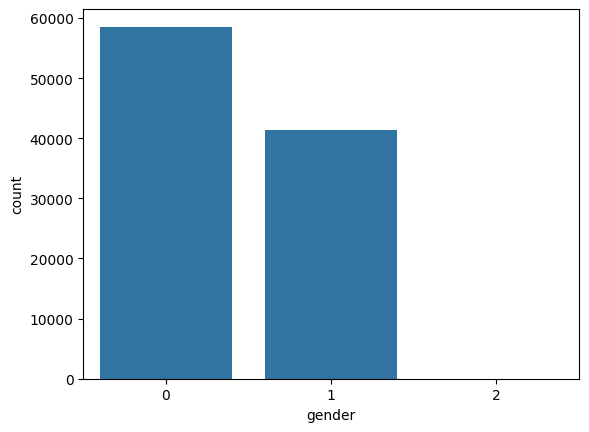

In [ ]:
sns.countplot(x='gender',data=df)

<Axes: >

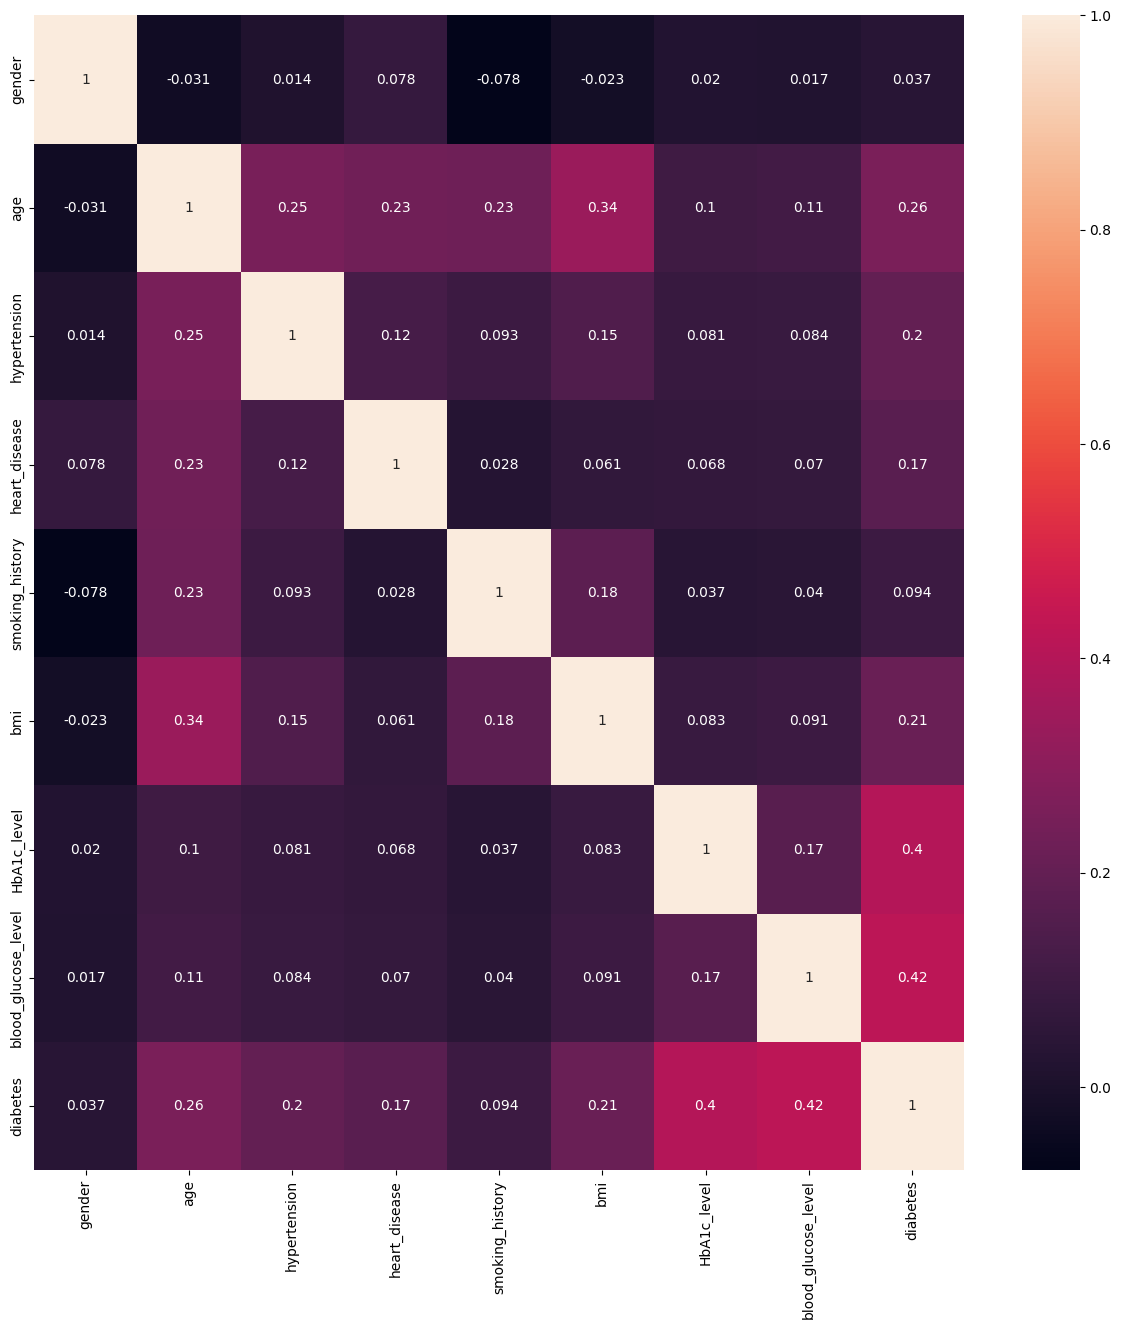

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.drop('diabetes',axis=1).values
x


array([[  0.  ,  80.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,  24.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,  57.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [ ]:
y=df['diabetes'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[  0.  ,  80.  ,   0.  , ...,  27.32,   4.8 , 159.  ],
       [  0.  ,   0.72,   0.  , ...,  16.02,   5.8 ,  90.  ],
       [  0.  ,  32.  ,   0.  , ...,  27.28,   6.6 , 159.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  41.23,   9.  , 145.  ],
       [  0.  ,  37.  ,   0.  , ...,  30.18,   5.8 ,  90.  ],
       [  0.  ,  52.  ,   0.  , ...,  27.32,   4.5 , 158.  ]])

In [ ]:
x_test

array([[  0.  ,  52.  ,   0.  , ...,  27.32,   4.8 , 140.  ],
       [  1.  ,  56.  ,   0.  , ...,  27.32,   4.8 , 100.  ],
       [  0.  ,  22.  ,   0.  , ...,  37.16,   6.6 ,  85.  ],
       ...,
       [  1.  ,  26.  ,   0.  , ...,  27.32,   6.2 , 145.  ],
       [  0.  ,  46.  ,   0.  , ...,  25.58,   5.7 , 200.  ],
       [  0.  ,  20.  ,   0.  , ...,  21.68,   5.7 , 155.  ]])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_test=scaler.transform(x_test)
x_train=scaler.transform(x_train)
x_test

array([[0.        , 0.64964965, 0.        , ..., 0.20203081, 0.23636364,
        0.27272727],
       [0.5       , 0.6996997 , 0.        , ..., 0.20203081, 0.23636364,
        0.09090909],
       [0.        , 0.27427427, 0.        , ..., 0.31687675, 0.56363636,
        0.02272727],
       ...,
       [0.5       , 0.32432432, 0.        , ..., 0.20203081, 0.49090909,
        0.29545455],
       [0.        , 0.57457457, 0.        , ..., 0.18172269, 0.4       ,
        0.54545455],
       [0.        , 0.24924925, 0.        , ..., 0.13620448, 0.4       ,
        0.34090909]])

In [ ]:
x_train

array([[0.        , 1.        , 0.        , ..., 0.20203081, 0.23636364,
        0.35909091],
       [0.        , 0.00800801, 0.        , ..., 0.07014472, 0.41818182,
        0.04545455],
       [0.        , 0.3993994 , 0.        , ..., 0.20156396, 0.56363636,
        0.35909091],
       ...,
       [0.5       , 0.82482482, 0.        , ..., 0.36437908, 1.        ,
        0.29545455],
       [0.        , 0.46196196, 0.        , ..., 0.23541083, 0.41818182,
        0.04545455],
       [0.        , 0.64964965, 0.        , ..., 0.20203081, 0.18181818,
        0.35454545]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
tree=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(random_state=100)
lg=LogisticRegression(solver='saga',max_iter=5)
lst=[knn,tree,rf,lg]


In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('model is ',i)
  print('accuracy score:',accuracy_score(y_test,y_pred))
  print('confusion matrix:',confusion_matrix(y_test,y_pred))
  print('report:',classification_report(y_test,y_pred))
  print('='*100)

model is  KNeighborsClassifier(n_neighbors=7)
accuracy score: 0.9623
confusion matrix: [[27337   124]
 [ 1007  1532]]
report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98     27461
           1       0.93      0.60      0.73      2539

    accuracy                           0.96     30000
   macro avg       0.94      0.80      0.86     30000
weighted avg       0.96      0.96      0.96     30000

model is  DecisionTreeClassifier(criterion='entropy')
accuracy score: 0.9510333333333333
confusion matrix: [[26678   783]
 [  686  1853]]
report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97     27461
           1       0.70      0.73      0.72      2539

    accuracy                           0.95     30000
   macro avg       0.84      0.85      0.84     30000
weighted avg       0.95      0.95      0.95     30000

model is  RandomForestClassifier(random_state=100)
accuracy score: 0.97
co

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
